# Practice Burnup pincell
## Geometry and depletion practice
### 16 October 2022

In [1]:
import openmc
import openmc.deplete
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

## Materials

In [2]:
# create fuel material
fuel = openmc.Material(name="uo2")
fuel.add_element("U", 1, percent_type="ao", enrichment=3)
fuel.add_element("O", 2)
fuel.set_density("g/cc", 10.5)
# create clad
clad = openmc.Material(name='clad')
clad.add_element("Zr", 1)
clad.set_density("g/cc", 6.0)
#create water
water = openmc.Material(name="water")
water.add_element("H",2)
water.add_element("O",1)
water.set_density("g/cc",0.712)
water.add_s_alpha_beta('c_H_in_H2O')

materials = openmc.Materials([fuel, clad, water])

## Create Geometry
pincell geometry for burnup calculation

In [3]:
h_cell = 300; # height of pincell

r_fuel = 0.42; # fuel radius
r_pin = 0.45; # clad radius

P_D = 1.4; # pitch to diameter ratio
pitch = P_D*(2*r_pin);

fuel_temp = 900; # representaive fuel temperature (K)
mod_temp = 600; # moderator temp (K)

# fuel cylinder
fuel_cyl = openmc.model.RightCircularCylinder([0,0,-h_cell/2],h_cell,r_fuel);

fuel.volume = np.pi*(r_fuel**2)*h_cell;

# pin cylinder
pin_cyl = openmc.model.RightCircularCylinder([0,0,-(h_cell+(r_pin-r_fuel))/2],h_cell+(r_pin-r_fuel)*2,r_pin);

# pin cell container

core_cell = openmc.model.RectangularParallelepiped(-pitch/2,pitch/2,
                                                   -pitch/2,pitch/2,
                                                   -(h_cell+100)/2,(h_cell+100)/2,
                                                   boundary_type = "reflective");
fuel_cell = openmc.Cell();
fuel_cell.region = -fuel_cyl
fuel_cell.fill = fuel;
fuel_cell.temperature = fuel_temp;

clad_cell = openmc.Cell();
clad_cell.region = +fuel_cyl & -pin_cyl;
clad_cell.fill = clad;

mod_cell = openmc.Cell();
mod_cell.region = +pin_cyl & - core_cell;
mod_cell.fill = water;
mod_cell.temperature = mod_temp;

root_univ = openmc.Universe();
root_univ.add_cells([fuel_cell,clad_cell,mod_cell]);

geometry = openmc.Geometry();
geometry.root_universe = root_univ;

materials.export_to_xml();
geometry.export_to_xml();


# create criticality settings

In [4]:
settings = openmc.Settings();
settings.run_mode = 'eigenvalue';
settings.particles = 20000;
settings.batches = 250;
settings.inactive = 50;

box = openmc.stats.Box(lower_left = (-r_fuel,-r_fuel,-h_cell/2),
                      upper_right = (r_fuel,r_fuel,h_cell/2),
                      only_fissionable=True);
src = openmc.Source(space=box);

settings.source = src;
settings.temperature['method']='interpolation';
settings.export_to_xml();

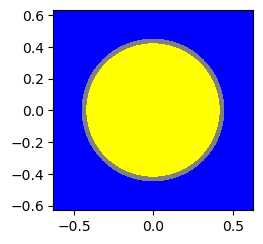

In [5]:
# create color dictionary
colors = {}
colors[water]='blue';
colors[fuel]='yellow';
colors[clad]='gray';

# plot pin cell universe to inspect geometry
root_univ.plot(width=(pitch,pitch),color_by='material',colors=colors);

# Conduct Depletion Calculation

In [6]:
model = openmc.model.Model(geometry,materials,settings)
operator = openmc.deplete.CoupledOperator(model,"chain_endfb71_pwr.xml");

# typical PWR power density
power_density = 30.5; # power density W/gHM
days = 24*3600;
time_steps = [0.5*days,0.5*days,1*days,5*days,
              23*days,150*days,365*days,365*days,
              365*days,365*days];
cecm = openmc.deplete.CECMIntegrator(operator,time_steps,power_density=power_density);

#repeat_depletion = False;

#if(repeat_depletion):
#    cecm.integrate()

cecm.integrate()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 Reading Mg24 from /home/m231326/omc_data/endfb71_hdf5/Mg24.h5
 Reading Mg25 from /home/m231326/omc_data/endfb71_hdf5/Mg25.h5
 Reading Mg26 from /home/m231326/omc_data/endfb71_hdf5/Mg26.h5
 Reading Al27 from /home/m231326/omc_data/endfb71_hdf5/Al27.h5
 Reading Si28 from /home/m231326/omc_data/endfb71_hdf5/Si28.h5
 Reading Si29 from /home/m231326/omc_data/endfb71_hdf5/Si29.h5
 Reading Si30 from /home/m231326/omc_data/endfb71_hdf5/Si30.h5
 Reading P31 from /home/m231326/omc_data/endfb71_hdf5/P31.h5
 Reading S32 from /home/m231326/omc_data/endfb71_hdf5/S32.h5
 Reading S33 from /home/m231326/omc_data/endfb71_hdf5/S33.h5
 Reading S34 from /home/m231326/omc_data/endfb71_hdf5/S34.h5
 Reading S36 from /home/m231326/omc_data/endfb71_hdf5/S36.h5
 Reading Cl35 from /home/m231326/omc_data/endfb71_hdf5/Cl35.h5
 Reading Cl37 from /home/m231326/omc_data/endfb71_hdf5/Cl37.h5
 Reading Ar36 from /home/m231326/omc_data/endfb71_hdf5/Ar36.h5


 Reading Ar38 from /home/m231326/omc_data/endfb71_hdf5/Ar38.h5
 Reading Ar40 from /home/m231326/omc_data/endfb71_hdf5/Ar40.h5
 Reading K39 from /home/m231326/omc_data/endfb71_hdf5/K39.h5
 Reading K40 from /home/m231326/omc_data/endfb71_hdf5/K40.h5
 Reading K41 from /home/m231326/omc_data/endfb71_hdf5/K41.h5
 Reading Ca40 from /home/m231326/omc_data/endfb71_hdf5/Ca40.h5
 Reading Ca42 from /home/m231326/omc_data/endfb71_hdf5/Ca42.h5
 Reading Ca43 from /home/m231326/omc_data/endfb71_hdf5/Ca43.h5
 Reading Ca44 from /home/m231326/omc_data/endfb71_hdf5/Ca44.h5
 Reading Ca46 from /home/m231326/omc_data/endfb71_hdf5/Ca46.h5
 Reading Ca48 from /home/m231326/omc_data/endfb71_hdf5/Ca48.h5
 Reading Sc45 from /home/m231326/omc_data/endfb71_hdf5/Sc45.h5
 Reading Ti46 from /home/m231326/omc_data/endfb71_hdf5/Ti46.h5
 Reading Ti47 from /home/m231326/omc_data/endfb71_hdf5/Ti47.h5
 Reading Ti48 from /home/m231326/omc_data/endfb71_hdf5/Ti48.h5
 Reading Ti49 from /home/m231326/omc_data/endfb71_hdf5/Ti49.h

 Reading Se80 from /home/m231326/omc_data/endfb71_hdf5/Se80.h5
 Reading Se82 from /home/m231326/omc_data/endfb71_hdf5/Se82.h5
 Reading Br79 from /home/m231326/omc_data/endfb71_hdf5/Br79.h5
 Reading Br81 from /home/m231326/omc_data/endfb71_hdf5/Br81.h5
 Reading Kr78 from /home/m231326/omc_data/endfb71_hdf5/Kr78.h5
 Reading Kr80 from /home/m231326/omc_data/endfb71_hdf5/Kr80.h5
 Reading Kr82 from /home/m231326/omc_data/endfb71_hdf5/Kr82.h5
 Reading Kr83 from /home/m231326/omc_data/endfb71_hdf5/Kr83.h5
 Reading Kr84 from /home/m231326/omc_data/endfb71_hdf5/Kr84.h5
 Reading Kr85 from /home/m231326/omc_data/endfb71_hdf5/Kr85.h5
 Reading Kr86 from /home/m231326/omc_data/endfb71_hdf5/Kr86.h5
 Reading Rb85 from /home/m231326/omc_data/endfb71_hdf5/Rb85.h5
 Reading Rb86 from /home/m231326/omc_data/endfb71_hdf5/Rb86.h5
 Reading Rb87 from /home/m231326/omc_data/endfb71_hdf5/Rb87.h5
 Reading Sr84 from /home/m231326/omc_data/endfb71_hdf5/Sr84.h5
 Reading Sr86 from /home/m231326/omc_data/endfb71_hdf5/

 Reading Nb95 from /home/m231326/omc_data/endfb71_hdf5/Nb95.h5
 Reading Mo92 from /home/m231326/omc_data/endfb71_hdf5/Mo92.h5
 Reading Mo94 from /home/m231326/omc_data/endfb71_hdf5/Mo94.h5
 Reading Mo95 from /home/m231326/omc_data/endfb71_hdf5/Mo95.h5
 Reading Mo96 from /home/m231326/omc_data/endfb71_hdf5/Mo96.h5
 Reading Mo97 from /home/m231326/omc_data/endfb71_hdf5/Mo97.h5
 Reading Mo98 from /home/m231326/omc_data/endfb71_hdf5/Mo98.h5
 Reading Mo99 from /home/m231326/omc_data/endfb71_hdf5/Mo99.h5
 Reading Mo100 from /home/m231326/omc_data/endfb71_hdf5/Mo100.h5
 Reading Tc99 from /home/m231326/omc_data/endfb71_hdf5/Tc99.h5


 Reading Ru96 from /home/m231326/omc_data/endfb71_hdf5/Ru96.h5
 Reading Ru98 from /home/m231326/omc_data/endfb71_hdf5/Ru98.h5
 Reading Ru99 from /home/m231326/omc_data/endfb71_hdf5/Ru99.h5
 Reading Ru100 from /home/m231326/omc_data/endfb71_hdf5/Ru100.h5
 Reading Ru101 from /home/m231326/omc_data/endfb71_hdf5/Ru101.h5
 Reading Ru102 from /home/m231326/omc_data/endfb71_hdf5/Ru102.h5
 Reading Ru103 from /home/m231326/omc_data/endfb71_hdf5/Ru103.h5
 Reading Ru104 from /home/m231326/omc_data/endfb71_hdf5/Ru104.h5
 Reading Ru105 from /home/m231326/omc_data/endfb71_hdf5/Ru105.h5
 Reading Ru106 from /home/m231326/omc_data/endfb71_hdf5/Ru106.h5
 Reading Rh103 from /home/m231326/omc_data/endfb71_hdf5/Rh103.h5
 Reading Rh105 from /home/m231326/omc_data/endfb71_hdf5/Rh105.h5
 Reading Pd102 from /home/m231326/omc_data/endfb71_hdf5/Pd102.h5
 Reading Pd104 from /home/m231326/omc_data/endfb71_hdf5/Pd104.h5
 Reading Pd105 from /home/m231326/omc_data/endfb71_hdf5/Pd105.h5
 Reading Pd106 from /home/m2313

          1200K
          2500K


 Reading Cd110 from /home/m231326/omc_data/endfb71_hdf5/Cd110.h5
 Reading Cd111 from /home/m231326/omc_data/endfb71_hdf5/Cd111.h5
 Reading Cd112 from /home/m231326/omc_data/endfb71_hdf5/Cd112.h5
 Reading Cd113 from /home/m231326/omc_data/endfb71_hdf5/Cd113.h5
 Reading Cd114 from /home/m231326/omc_data/endfb71_hdf5/Cd114.h5
 Reading Cd115_m1 from /home/m231326/omc_data/endfb71_hdf5/Cd115_m1.h5
 Reading Cd116 from /home/m231326/omc_data/endfb71_hdf5/Cd116.h5
 Reading In113 from /home/m231326/omc_data/endfb71_hdf5/In113.h5
 Reading In115 from /home/m231326/omc_data/endfb71_hdf5/In115.h5
 Reading Sn112 from /home/m231326/omc_data/endfb71_hdf5/Sn112.h5
 Reading Sn113 from /home/m231326/omc_data/endfb71_hdf5/Sn113.h5
 Reading Sn114 from /home/m231326/omc_data/endfb71_hdf5/Sn114.h5
 Reading Sn115 from /home/m231326/omc_data/endfb71_hdf5/Sn115.h5
 Reading Sn116 from /home/m231326/omc_data/endfb71_hdf5/Sn116.h5
 Reading Sn117 from /home/m231326/omc_data/endfb71_hdf5/Sn117.h5
 Reading Sn118 from

          1200K
          2500K


 Reading Sn126 from /home/m231326/omc_data/endfb71_hdf5/Sn126.h5
 Reading Sb121 from /home/m231326/omc_data/endfb71_hdf5/Sb121.h5
 Reading Sb123 from /home/m231326/omc_data/endfb71_hdf5/Sb123.h5
 Reading Sb124 from /home/m231326/omc_data/endfb71_hdf5/Sb124.h5
 Reading Sb125 from /home/m231326/omc_data/endfb71_hdf5/Sb125.h5
 Reading Sb126 from /home/m231326/omc_data/endfb71_hdf5/Sb126.h5
 Reading Te120 from /home/m231326/omc_data/endfb71_hdf5/Te120.h5
 Reading Te122 from /home/m231326/omc_data/endfb71_hdf5/Te122.h5
 Reading Te123 from /home/m231326/omc_data/endfb71_hdf5/Te123.h5
 Reading Te124 from /home/m231326/omc_data/endfb71_hdf5/Te124.h5
 Reading Te125 from /home/m231326/omc_data/endfb71_hdf5/Te125.h5
 Reading Te126 from /home/m231326/omc_data/endfb71_hdf5/Te126.h5


          1200K
          2500K


 Reading Te127_m1 from /home/m231326/omc_data/endfb71_hdf5/Te127_m1.h5
 Reading Te128 from /home/m231326/omc_data/endfb71_hdf5/Te128.h5
 Reading Te129_m1 from /home/m231326/omc_data/endfb71_hdf5/Te129_m1.h5
 Reading Te130 from /home/m231326/omc_data/endfb71_hdf5/Te130.h5
 Reading Te132 from /home/m231326/omc_data/endfb71_hdf5/Te132.h5
 Reading I127 from /home/m231326/omc_data/endfb71_hdf5/I127.h5
 Reading I129 from /home/m231326/omc_data/endfb71_hdf5/I129.h5
 Reading I130 from /home/m231326/omc_data/endfb71_hdf5/I130.h5
 Reading I131 from /home/m231326/omc_data/endfb71_hdf5/I131.h5
 Reading I135 from /home/m231326/omc_data/endfb71_hdf5/I135.h5
 Reading Xe123 from /home/m231326/omc_data/endfb71_hdf5/Xe123.h5


 Reading Xe124 from /home/m231326/omc_data/endfb71_hdf5/Xe124.h5
 Reading Xe126 from /home/m231326/omc_data/endfb71_hdf5/Xe126.h5
 Reading Xe128 from /home/m231326/omc_data/endfb71_hdf5/Xe128.h5
 Reading Xe129 from /home/m231326/omc_data/endfb71_hdf5/Xe129.h5
 Reading Xe130 from /home/m231326/omc_data/endfb71_hdf5/Xe130.h5
 Reading Xe131 from /home/m231326/omc_data/endfb71_hdf5/Xe131.h5
 Reading Xe132 from /home/m231326/omc_data/endfb71_hdf5/Xe132.h5
 Reading Xe133 from /home/m231326/omc_data/endfb71_hdf5/Xe133.h5
 Reading Xe134 from /home/m231326/omc_data/endfb71_hdf5/Xe134.h5
 Reading Xe135 from /home/m231326/omc_data/endfb71_hdf5/Xe135.h5
 Reading Xe136 from /home/m231326/omc_data/endfb71_hdf5/Xe136.h5
 Reading Cs133 from /home/m231326/omc_data/endfb71_hdf5/Cs133.h5


          2500K


 Reading Cs134 from /home/m231326/omc_data/endfb71_hdf5/Cs134.h5
 Reading Cs135 from /home/m231326/omc_data/endfb71_hdf5/Cs135.h5
 Reading Cs136 from /home/m231326/omc_data/endfb71_hdf5/Cs136.h5
 Reading Cs137 from /home/m231326/omc_data/endfb71_hdf5/Cs137.h5
 Reading Ba130 from /home/m231326/omc_data/endfb71_hdf5/Ba130.h5
 Reading Ba132 from /home/m231326/omc_data/endfb71_hdf5/Ba132.h5
 Reading Ba133 from /home/m231326/omc_data/endfb71_hdf5/Ba133.h5


          1200K
          2500K


 Reading Ba134 from /home/m231326/omc_data/endfb71_hdf5/Ba134.h5
 Reading Ba135 from /home/m231326/omc_data/endfb71_hdf5/Ba135.h5
 Reading Ba136 from /home/m231326/omc_data/endfb71_hdf5/Ba136.h5
 Reading Ba137 from /home/m231326/omc_data/endfb71_hdf5/Ba137.h5
 Reading Ba138 from /home/m231326/omc_data/endfb71_hdf5/Ba138.h5
 Reading Ba140 from /home/m231326/omc_data/endfb71_hdf5/Ba140.h5
 Reading La138 from /home/m231326/omc_data/endfb71_hdf5/La138.h5
 Reading La139 from /home/m231326/omc_data/endfb71_hdf5/La139.h5
 Reading La140 from /home/m231326/omc_data/endfb71_hdf5/La140.h5
 Reading Ce136 from /home/m231326/omc_data/endfb71_hdf5/Ce136.h5
 Reading Ce138 from /home/m231326/omc_data/endfb71_hdf5/Ce138.h5
 Reading Ce139 from /home/m231326/omc_data/endfb71_hdf5/Ce139.h5
 Reading Ce140 from /home/m231326/omc_data/endfb71_hdf5/Ce140.h5
 Reading Ce141 from /home/m231326/omc_data/endfb71_hdf5/Ce141.h5
 Reading Ce142 from /home/m231326/omc_data/endfb71_hdf5/Ce142.h5
 Reading Ce143 from /home

          1200K
          2500K


 Reading Gd152 from /home/m231326/omc_data/endfb71_hdf5/Gd152.h5
 Reading Gd153 from /home/m231326/omc_data/endfb71_hdf5/Gd153.h5
 Reading Gd154 from /home/m231326/omc_data/endfb71_hdf5/Gd154.h5
 Reading Gd155 from /home/m231326/omc_data/endfb71_hdf5/Gd155.h5
 Reading Gd156 from /home/m231326/omc_data/endfb71_hdf5/Gd156.h5
 Reading Gd157 from /home/m231326/omc_data/endfb71_hdf5/Gd157.h5
 Reading Gd158 from /home/m231326/omc_data/endfb71_hdf5/Gd158.h5
 Reading Gd160 from /home/m231326/omc_data/endfb71_hdf5/Gd160.h5
 Reading Tb159 from /home/m231326/omc_data/endfb71_hdf5/Tb159.h5
 Reading Tb160 from /home/m231326/omc_data/endfb71_hdf5/Tb160.h5
 Reading Dy156 from /home/m231326/omc_data/endfb71_hdf5/Dy156.h5
 Reading Dy158 from /home/m231326/omc_data/endfb71_hdf5/Dy158.h5
 Reading Dy160 from /home/m231326/omc_data/endfb71_hdf5/Dy160.h5
 Reading Dy161 from /home/m231326/omc_data/endfb71_hdf5/Dy161.h5
 Reading Dy162 from /home/m231326/omc_data/endfb71_hdf5/Dy162.h5
 Reading Dy163 from /home

 Reading Cf246 from /home/m231326/omc_data/endfb71_hdf5/Cf246.h5
 Reading Cf248 from /home/m231326/omc_data/endfb71_hdf5/Cf248.h5
 Reading Cf249 from /home/m231326/omc_data/endfb71_hdf5/Cf249.h5
 Reading Cf250 from /home/m231326/omc_data/endfb71_hdf5/Cf250.h5
 Reading Cf251 from /home/m231326/omc_data/endfb71_hdf5/Cf251.h5
 Reading Cf252 from /home/m231326/omc_data/endfb71_hdf5/Cf252.h5


          1200K


 Reading Cf253 from /home/m231326/omc_data/endfb71_hdf5/Cf253.h5
 Reading Cf254 from /home/m231326/omc_data/endfb71_hdf5/Cf254.h5
 Reading Es251 from /home/m231326/omc_data/endfb71_hdf5/Es251.h5
 Reading Es252 from /home/m231326/omc_data/endfb71_hdf5/Es252.h5
 Reading Es253 from /home/m231326/omc_data/endfb71_hdf5/Es253.h5
 Reading Es254 from /home/m231326/omc_data/endfb71_hdf5/Es254.h5
 Reading Es254_m1 from /home/m231326/omc_data/endfb71_hdf5/Es254_m1.h5
 Reading Es255 from /home/m231326/omc_data/endfb71_hdf5/Es255.h5
 Reading Fm255 from /home/m231326/omc_data/endfb71_hdf5/Fm255.h5
 Maximum neutron transport energy: 20000000 eV for O17
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.30367
        2/1    1.32042
        3/1    1.32354
        4/1    1.32167
        5/1    1.31469
        6/1    1.32741
        7/1    1.

      187/1    1.32914    1.31777 +/- 0.00085
      188/1    1.33195    1.31788 +/- 0.00085
      189/1    1.32221    1.31791 +/- 0.00084
      190/1    1.32314    1.31794 +/- 0.00084
      191/1    1.33847    1.31809 +/- 0.00084
      192/1    1.31535    1.31807 +/- 0.00084
      193/1    1.33494    1.31819 +/- 0.00084
      194/1    1.32337    1.31822 +/- 0.00083
      195/1    1.32704    1.31829 +/- 0.00083
      196/1    1.32246    1.31831 +/- 0.00083
      197/1    1.31339    1.31828 +/- 0.00082
      198/1    1.30686    1.31820 +/- 0.00082
      199/1    1.30682    1.31813 +/- 0.00082
      200/1    1.31459    1.31810 +/- 0.00081
      201/1    1.29427    1.31795 +/- 0.00082
      202/1    1.30932    1.31789 +/- 0.00082
      203/1    1.33937    1.31803 +/- 0.00082
      204/1    1.32850    1.31810 +/- 0.00082
      205/1    1.31899    1.31810 +/- 0.00082
      206/1    1.29475    1.31795 +/- 0.00083
      207/1    1.32985    1.31803 +/- 0.00082
      208/1    1.33057    1.31811 

      106/1    1.32436    1.30436 +/- 0.00133
      107/1    1.29662    1.30422 +/- 0.00132
      108/1    1.29639    1.30409 +/- 0.00130
      109/1    1.29714    1.30397 +/- 0.00129
      110/1    1.28808    1.30371 +/- 0.00129
      111/1    1.29504    1.30356 +/- 0.00128
      112/1    1.31442    1.30374 +/- 0.00127
      113/1    1.29772    1.30364 +/- 0.00125
      114/1    1.31198    1.30377 +/- 0.00124
      115/1    1.30012    1.30372 +/- 0.00122
      116/1    1.31001    1.30381 +/- 0.00121
      117/1    1.31826    1.30403 +/- 0.00121
      118/1    1.30713    1.30407 +/- 0.00119
      119/1    1.29094    1.30388 +/- 0.00119
      120/1    1.29131    1.30370 +/- 0.00119
      121/1    1.28848    1.30349 +/- 0.00119
      122/1    1.30551    1.30352 +/- 0.00117
      123/1    1.31138    1.30363 +/- 0.00116
      124/1    1.32053    1.30385 +/- 0.00117
      125/1    1.31263    1.30397 +/- 0.00116
      126/1    1.32045    1.30419 +/- 0.00116
      127/1    1.31599    1.30434 

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.25558
        2/1    1.27608
        3/1    1.29183
        4/1    1.28342
        5/1    1.27876
        6/1    1.26844
        7/1    1.30356
        8/1    1.27777
        9/1    1.28938
       10/1    1.27878
       11/1    1.28648
       12/1    1.27128
       13/1    1.30785
       14/1    1.28574
       15/1    1.28168
       16/1    1.28025
       17/1    1.30809
       18/1    1.30608
       19/1    1.29549
       20/1    1.28980
       21/1    1.26993
       22/1    1.27863
       23/1    1.29635
       24/1    1.27838
       25/1    1.28687
       26/1    1.28962
       27/1    1.29746
       28/1    1.28339
       29/1    1.29500
       30/1    1.29018
       31/1    1.28304
       32/1    1.27683
       33/1    1.30515
       34/1    1.29531
       35/1    1.29651
       36/1    1.27305
       37/1    1.29255
       38/1    1.29971
       39/1    1.27895
       40/1    1.

      203/1    1.29351    1.29185 +/- 0.00089
      204/1    1.29971    1.29190 +/- 0.00089
      205/1    1.27383    1.29179 +/- 0.00089
      206/1    1.28776    1.29176 +/- 0.00089
      207/1    1.30145    1.29182 +/- 0.00088
      208/1    1.27280    1.29170 +/- 0.00088
      209/1    1.28127    1.29164 +/- 0.00088
      210/1    1.30727    1.29173 +/- 0.00088
      211/1    1.30067    1.29179 +/- 0.00088
      212/1    1.29927    1.29183 +/- 0.00087
      213/1    1.32790    1.29206 +/- 0.00090
      214/1    1.29009    1.29204 +/- 0.00089
      215/1    1.28613    1.29201 +/- 0.00089
      216/1    1.29755    1.29204 +/- 0.00088
      217/1    1.28654    1.29201 +/- 0.00088
      218/1    1.29699    1.29204 +/- 0.00087
      219/1    1.28068    1.29197 +/- 0.00087
      220/1    1.31640    1.29211 +/- 0.00088
      221/1    1.28165    1.29205 +/- 0.00087
      222/1    1.28967    1.29204 +/- 0.00087
      223/1    1.27768    1.29196 +/- 0.00087
      224/1    1.26915    1.29183 

      122/1    1.27746    1.28382 +/- 0.00136
      123/1    1.27502    1.28370 +/- 0.00135
      124/1    1.29605    1.28387 +/- 0.00134
      125/1    1.28420    1.28387 +/- 0.00132
      126/1    1.28513    1.28389 +/- 0.00131
      127/1    1.27494    1.28377 +/- 0.00129
      128/1    1.27663    1.28368 +/- 0.00128
      129/1    1.27245    1.28354 +/- 0.00127
      130/1    1.28497    1.28356 +/- 0.00126
      131/1    1.28400    1.28356 +/- 0.00124
      132/1    1.28121    1.28353 +/- 0.00123
      133/1    1.29049    1.28362 +/- 0.00121
      134/1    1.27416    1.28350 +/- 0.00120
      135/1    1.28758    1.28355 +/- 0.00119
      136/1    1.26481    1.28333 +/- 0.00120
      137/1    1.27174    1.28320 +/- 0.00119
      138/1    1.27526    1.28311 +/- 0.00118
      139/1    1.27036    1.28297 +/- 0.00118
      140/1    1.29641    1.28312 +/- 0.00117
      141/1    1.27901    1.28307 +/- 0.00116
      142/1    1.31485    1.28342 +/- 0.00120
      143/1    1.26181    1.28319 

       29/1    1.27599
       30/1    1.28463
       31/1    1.28166
       32/1    1.25915
       33/1    1.28009
       34/1    1.28576
       35/1    1.27319
       36/1    1.29458
       37/1    1.28068
       38/1    1.28346
       39/1    1.26643
       40/1    1.29344
       41/1    1.26005
       42/1    1.26892
       43/1    1.28392
       44/1    1.28617
       45/1    1.27854
       46/1    1.26912
       47/1    1.25756
       48/1    1.25788
       49/1    1.27157
       50/1    1.26553
       51/1    1.26316
       52/1    1.26059    1.26187 +/- 0.00129
       53/1    1.26747    1.26374 +/- 0.00201
       54/1    1.27809    1.26733 +/- 0.00386
       55/1    1.26327    1.26652 +/- 0.00310
       56/1    1.26355    1.26602 +/- 0.00258
       57/1    1.27614    1.26747 +/- 0.00261
       58/1    1.29792    1.27127 +/- 0.00443
       59/1    1.27005    1.27114 +/- 0.00391
       60/1    1.28822    1.27285 +/- 0.00389
       61/1    1.27798    1.27331 +/- 0.00355
       62/1

      219/1    1.28252    1.27948 +/- 0.00084
      220/1    1.30372    1.27962 +/- 0.00084
      221/1    1.28374    1.27965 +/- 0.00084
      222/1    1.26418    1.27956 +/- 0.00084
      223/1    1.27187    1.27951 +/- 0.00084
      224/1    1.26004    1.27940 +/- 0.00084
      225/1    1.24681    1.27921 +/- 0.00085
      226/1    1.29090    1.27928 +/- 0.00085
      227/1    1.28076    1.27929 +/- 0.00085
      228/1    1.27811    1.27928 +/- 0.00084
      229/1    1.28181    1.27930 +/- 0.00084
      230/1    1.28061    1.27930 +/- 0.00083
      231/1    1.28579    1.27934 +/- 0.00083
      232/1    1.27759    1.27933 +/- 0.00082
      233/1    1.26060    1.27923 +/- 0.00083
      234/1    1.28684    1.27927 +/- 0.00082
      235/1    1.27222    1.27923 +/- 0.00082
      236/1    1.27139    1.27919 +/- 0.00082
      237/1    1.27467    1.27916 +/- 0.00081
      238/1    1.28233    1.27918 +/- 0.00081
      239/1    1.29684    1.27927 +/- 0.00081
      240/1    1.27754    1.27926 

      138/1    1.25124    1.27423 +/- 0.00128
      139/1    1.27934    1.27429 +/- 0.00126
      140/1    1.27644    1.27432 +/- 0.00125
      141/1    1.30109    1.27461 +/- 0.00127
      142/1    1.27339    1.27460 +/- 0.00126
      143/1    1.26822    1.27453 +/- 0.00124
      144/1    1.28272    1.27461 +/- 0.00123
      145/1    1.27630    1.27463 +/- 0.00122
      146/1    1.28403    1.27473 +/- 0.00121
      147/1    1.28617    1.27485 +/- 0.00121
      148/1    1.27641    1.27486 +/- 0.00119
      149/1    1.27137    1.27483 +/- 0.00118
      150/1    1.25274    1.27461 +/- 0.00119
      151/1    1.27910    1.27465 +/- 0.00118
      152/1    1.27498    1.27466 +/- 0.00117
      153/1    1.27552    1.27466 +/- 0.00116
      154/1    1.26129    1.27454 +/- 0.00115
      155/1    1.26747    1.27447 +/- 0.00114
      156/1    1.25651    1.27430 +/- 0.00115
      157/1    1.26656    1.27423 +/- 0.00114
      158/1    1.27306    1.27422 +/- 0.00113
      159/1    1.26323    1.27412 

       57/1    1.28522    1.27584 +/- 0.00238
       58/1    1.27102    1.27524 +/- 0.00215
       59/1    1.26581    1.27419 +/- 0.00217
       60/1    1.26338    1.27311 +/- 0.00222
       61/1    1.26871    1.27271 +/- 0.00205
       62/1    1.28779    1.27397 +/- 0.00225
       63/1    1.26659    1.27340 +/- 0.00215
       64/1    1.27678    1.27364 +/- 0.00200
       65/1    1.27255    1.27357 +/- 0.00187
       66/1    1.27629    1.27374 +/- 0.00175
       67/1    1.27281    1.27368 +/- 0.00165
       68/1    1.25944    1.27289 +/- 0.00174
       69/1    1.28983    1.27378 +/- 0.00187
       70/1    1.27476    1.27383 +/- 0.00178
       71/1    1.27362    1.27382 +/- 0.00169
       72/1    1.28855    1.27449 +/- 0.00175
       73/1    1.26352    1.27401 +/- 0.00174
       74/1    1.25706    1.27331 +/- 0.00181
       75/1    1.27748    1.27348 +/- 0.00174
       76/1    1.26603    1.27319 +/- 0.00170
       77/1    1.25296    1.27244 +/- 0.00180
       78/1    1.27171    1.27241 

      236/1    1.27277    1.27238 +/- 0.00078
      237/1    1.25839    1.27230 +/- 0.00078
      238/1    1.27949    1.27234 +/- 0.00077
      239/1    1.27029    1.27233 +/- 0.00077
      240/1    1.26432    1.27229 +/- 0.00077
      241/1    1.27407    1.27230 +/- 0.00076
      242/1    1.28737    1.27237 +/- 0.00076
      243/1    1.26338    1.27233 +/- 0.00076
      244/1    1.29368    1.27244 +/- 0.00076
      245/1    1.27288    1.27244 +/- 0.00076
      246/1    1.27491    1.27245 +/- 0.00076
      247/1    1.26432    1.27241 +/- 0.00075
      248/1    1.26728    1.27239 +/- 0.00075
      249/1    1.27590    1.27240 +/- 0.00075
      250/1    1.26441    1.27236 +/- 0.00074
 Creating state point statepoint.250.h5...

 =======================>     TIMING STATISTICS     <=======================

 Total time for initialization     = 0.0000e+00 seconds
   Reading cross sections          = 0.0000e+00 seconds
 Total time in simulation          = 5.6730e+02 seconds
   Time in transport

      155/1    1.25918    1.26812 +/- 0.00107
      156/1    1.28877    1.26831 +/- 0.00108
      157/1    1.27100    1.26834 +/- 0.00107
      158/1    1.27364    1.26839 +/- 0.00106
      159/1    1.26255    1.26833 +/- 0.00105
      160/1    1.28964    1.26853 +/- 0.00106
      161/1    1.27637    1.26860 +/- 0.00105
      162/1    1.29976    1.26887 +/- 0.00108
      163/1    1.29316    1.26909 +/- 0.00109
      164/1    1.26114    1.26902 +/- 0.00109
      165/1    1.24753    1.26883 +/- 0.00109
      166/1    1.26486    1.26880 +/- 0.00108
      167/1    1.27605    1.26886 +/- 0.00108
      168/1    1.25823    1.26877 +/- 0.00107
      169/1    1.29274    1.26897 +/- 0.00108
      170/1    1.27094    1.26899 +/- 0.00107
      171/1    1.28293    1.26910 +/- 0.00107
      172/1    1.28345    1.26922 +/- 0.00107
      173/1    1.27316    1.26925 +/- 0.00106
      174/1    1.25433    1.26913 +/- 0.00106
      175/1    1.26031    1.26906 +/- 0.00105
      176/1    1.26054    1.26899 

       74/1    1.26675    1.26348 +/- 0.00224
       75/1    1.26666    1.26361 +/- 0.00216
       76/1    1.27987    1.26423 +/- 0.00216
       77/1    1.27699    1.26470 +/- 0.00213
       78/1    1.25830    1.26448 +/- 0.00207
       79/1    1.27366    1.26479 +/- 0.00202
       80/1    1.25141    1.26435 +/- 0.00200
       81/1    1.26180    1.26426 +/- 0.00194
       82/1    1.27388    1.26456 +/- 0.00190
       83/1    1.28558    1.26520 +/- 0.00195
       84/1    1.26314    1.26514 +/- 0.00189
       85/1    1.26823    1.26523 +/- 0.00184
       86/1    1.24659    1.26471 +/- 0.00186
       87/1    1.25452    1.26444 +/- 0.00183
       88/1    1.26263    1.26439 +/- 0.00178
       89/1    1.26769    1.26447 +/- 0.00174
       90/1    1.25997    1.26436 +/- 0.00170
       91/1    1.26922    1.26448 +/- 0.00166
       92/1    1.25557    1.26427 +/- 0.00163
       93/1    1.27275    1.26446 +/- 0.00161
       94/1    1.26191    1.26441 +/- 0.00157
       95/1    1.27422    1.26462 

 Maximum neutron transport energy: 20000000 eV for O17
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.25118
        2/1    1.24967
        3/1    1.23423
        4/1    1.25568
        5/1    1.26667
        6/1    1.24864
        7/1    1.25139
        8/1    1.26195
        9/1    1.23714
       10/1    1.22335
       11/1    1.25984
       12/1    1.26720
       13/1    1.25342
       14/1    1.24443
       15/1    1.26011
       16/1    1.25358
       17/1    1.25312
       18/1    1.24641
       19/1    1.25207
       20/1    1.25610
       21/1    1.23987
       22/1    1.26466
       23/1    1.27408
       24/1    1.25351
       25/1    1.26950
       26/1    1.26086
       27/1    1.25856
       28/1    1.26361
       29/1    1.25217
       30/1    1.26666
       31/1    1.25614
       32/1    1.25115
       33/

      200/1    1.24954    1.25975 +/- 0.00086
      201/1    1.25923    1.25975 +/- 0.00085
      202/1    1.26261    1.25977 +/- 0.00085
      203/1    1.26295    1.25979 +/- 0.00084
      204/1    1.24368    1.25969 +/- 0.00084
      205/1    1.25468    1.25965 +/- 0.00084
      206/1    1.26078    1.25966 +/- 0.00083
      207/1    1.26006    1.25966 +/- 0.00083
      208/1    1.26805    1.25972 +/- 0.00082
      209/1    1.27715    1.25983 +/- 0.00083
      210/1    1.26674    1.25987 +/- 0.00082
      211/1    1.25264    1.25982 +/- 0.00082
      212/1    1.28494    1.25998 +/- 0.00083
      213/1    1.24518    1.25989 +/- 0.00083
      214/1    1.28172    1.26002 +/- 0.00083
      215/1    1.25278    1.25998 +/- 0.00083
      216/1    1.25217    1.25993 +/- 0.00083
      217/1    1.25353    1.25989 +/- 0.00082
      218/1    1.27044    1.25996 +/- 0.00082
      219/1    1.25438    1.25992 +/- 0.00082
      220/1    1.25295    1.25988 +/- 0.00081
      221/1    1.23042    1.25971 

      119/1    1.22968    1.25553 +/- 0.00150
      120/1    1.26077    1.25561 +/- 0.00148
      121/1    1.24846    1.25551 +/- 0.00146
      122/1    1.25895    1.25556 +/- 0.00144
      123/1    1.23038    1.25521 +/- 0.00146
      124/1    1.28119    1.25556 +/- 0.00149
      125/1    1.25492    1.25555 +/- 0.00147
      126/1    1.27204    1.25577 +/- 0.00146
      127/1    1.25940    1.25582 +/- 0.00144
      128/1    1.25780    1.25584 +/- 0.00143
      129/1    1.25061    1.25578 +/- 0.00141
      130/1    1.26019    1.25583 +/- 0.00139
      131/1    1.25043    1.25577 +/- 0.00138
      132/1    1.26251    1.25585 +/- 0.00136
      133/1    1.24143    1.25567 +/- 0.00136
      134/1    1.25252    1.25564 +/- 0.00134
      135/1    1.24615    1.25553 +/- 0.00133
      136/1    1.25607    1.25553 +/- 0.00131
      137/1    1.25674    1.25555 +/- 0.00130
      138/1    1.26383    1.25564 +/- 0.00129
      139/1    1.23685    1.25543 +/- 0.00129
      140/1    1.25774    1.25545 

       24/1    1.21714
       25/1    1.21034
       26/1    1.20292
       27/1    1.21562
       28/1    1.21916
       29/1    1.22528
       30/1    1.22681
       31/1    1.20672
       32/1    1.23396
       33/1    1.22624
       34/1    1.20197
       35/1    1.23113
       36/1    1.21308
       37/1    1.19956
       38/1    1.22259
       39/1    1.21579
       40/1    1.21208
       41/1    1.21461
       42/1    1.24593
       43/1    1.21444
       44/1    1.20347
       45/1    1.21716
       46/1    1.21590
       47/1    1.22062
       48/1    1.22555
       49/1    1.22502
       50/1    1.19183
       51/1    1.21996
       52/1    1.22009    1.22002 +/- 0.00007
       53/1    1.21873    1.21959 +/- 0.00043
       54/1    1.22321    1.22049 +/- 0.00096
       55/1    1.23120    1.22264 +/- 0.00227
       56/1    1.20836    1.22026 +/- 0.00301
       57/1    1.21174    1.21904 +/- 0.00282
       58/1    1.20458    1.21723 +/- 0.00304
       59/1    1.22151    1.21771 

      217/1    1.21565    1.22119 +/- 0.00080
      218/1    1.23478    1.22127 +/- 0.00080
      219/1    1.20878    1.22120 +/- 0.00080
      220/1    1.22674    1.22123 +/- 0.00080
      221/1    1.23966    1.22134 +/- 0.00080
      222/1    1.23178    1.22140 +/- 0.00080
      223/1    1.20994    1.22133 +/- 0.00080
      224/1    1.19792    1.22120 +/- 0.00080
      225/1    1.23313    1.22126 +/- 0.00080
      226/1    1.22482    1.22129 +/- 0.00080
      227/1    1.22474    1.22130 +/- 0.00079
      228/1    1.21369    1.22126 +/- 0.00079
      229/1    1.22434    1.22128 +/- 0.00078
      230/1    1.21687    1.22125 +/- 0.00078
      231/1    1.23134    1.22131 +/- 0.00078
      232/1    1.21975    1.22130 +/- 0.00077
      233/1    1.21626    1.22127 +/- 0.00077
      234/1    1.23288    1.22134 +/- 0.00077
      235/1    1.23323    1.22140 +/- 0.00077
      236/1    1.24386    1.22152 +/- 0.00077
      237/1    1.21891    1.22151 +/- 0.00077
      238/1    1.20965    1.22145 

      135/1    1.18436    1.18900 +/- 0.00124
      136/1    1.16952    1.18877 +/- 0.00125
      137/1    1.19247    1.18881 +/- 0.00123
      138/1    1.19884    1.18893 +/- 0.00123
      139/1    1.19313    1.18897 +/- 0.00121
      140/1    1.17471    1.18882 +/- 0.00121
      141/1    1.18791    1.18881 +/- 0.00120
      142/1    1.20573    1.18899 +/- 0.00120
      143/1    1.19199    1.18902 +/- 0.00118
      144/1    1.16749    1.18879 +/- 0.00119
      145/1    1.18073    1.18871 +/- 0.00118
      146/1    1.18849    1.18871 +/- 0.00117
      147/1    1.17844    1.18860 +/- 0.00116
      148/1    1.17970    1.18851 +/- 0.00116
      149/1    1.18344    1.18846 +/- 0.00115
      150/1    1.17810    1.18835 +/- 0.00114
      151/1    1.19824    1.18845 +/- 0.00113
      152/1    1.17617    1.18833 +/- 0.00113
      153/1    1.18702    1.18832 +/- 0.00112
      154/1    1.19005    1.18834 +/- 0.00111
      155/1    1.18172    1.18827 +/- 0.00110
      156/1    1.20575    1.18844 

       54/1    1.12325    1.12578 +/- 0.00659
       55/1    1.11797    1.12422 +/- 0.00533
       56/1    1.12416    1.12421 +/- 0.00436
       57/1    1.13487    1.12573 +/- 0.00398
       58/1    1.12740    1.12594 +/- 0.00346
       59/1    1.12583    1.12593 +/- 0.00305
       60/1    1.12949    1.12628 +/- 0.00275
       61/1    1.14973    1.12841 +/- 0.00328
       62/1    1.12725    1.12832 +/- 0.00299
       63/1    1.13805    1.12907 +/- 0.00285
       64/1    1.11833    1.12830 +/- 0.00275
       65/1    1.12361    1.12799 +/- 0.00258
       66/1    1.12616    1.12787 +/- 0.00242
       67/1    1.11662    1.12721 +/- 0.00236
       68/1    1.12450    1.12706 +/- 0.00223
       69/1    1.10722    1.12602 +/- 0.00236
       70/1    1.13538    1.12648 +/- 0.00228
       71/1    1.12125    1.12623 +/- 0.00219
       72/1    1.10721    1.12537 +/- 0.00226
       73/1    1.12660    1.12542 +/- 0.00216
       74/1    1.11012    1.12479 +/- 0.00216
       75/1    1.14024    1.12540 

      233/1    1.12151    1.12311 +/- 0.00081
      234/1    1.12893    1.12315 +/- 0.00080
      235/1    1.11853    1.12312 +/- 0.00080
      236/1    1.11596    1.12308 +/- 0.00079
      237/1    1.12462    1.12309 +/- 0.00079
      238/1    1.13033    1.12313 +/- 0.00079
      239/1    1.11960    1.12311 +/- 0.00078
      240/1    1.12036    1.12310 +/- 0.00078
      241/1    1.12435    1.12310 +/- 0.00077
      242/1    1.11189    1.12304 +/- 0.00077
      243/1    1.13456    1.12310 +/- 0.00077
      244/1    1.12234    1.12310 +/- 0.00077
      245/1    1.11960    1.12308 +/- 0.00076
      246/1    1.14295    1.12318 +/- 0.00077
      247/1    1.11047    1.12312 +/- 0.00077
      248/1    1.11965    1.12310 +/- 0.00076
      249/1    1.10762    1.12302 +/- 0.00076
      250/1    1.13113    1.12306 +/- 0.00076
 Creating state point statepoint.250.h5...

 =======================>     TIMING STATISTICS     <=======================

 Total time for initialization     = 0.0000e+00 se

      151/1    1.07183    1.06928 +/- 0.00094
      152/1    1.07910    1.06937 +/- 0.00094
      153/1    1.04847    1.06917 +/- 0.00095
      154/1    1.06337    1.06911 +/- 0.00094
      155/1    1.05457    1.06898 +/- 0.00094
      156/1    1.06547    1.06894 +/- 0.00093
      157/1    1.06799    1.06893 +/- 0.00093
      158/1    1.07034    1.06895 +/- 0.00092
      159/1    1.05289    1.06880 +/- 0.00092
      160/1    1.06149    1.06873 +/- 0.00091
      161/1    1.07983    1.06883 +/- 0.00091
      162/1    1.06323    1.06878 +/- 0.00090
      163/1    1.08021    1.06888 +/- 0.00090
      164/1    1.07170    1.06891 +/- 0.00089
      165/1    1.05963    1.06883 +/- 0.00089
      166/1    1.06492    1.06879 +/- 0.00088
      167/1    1.07033    1.06881 +/- 0.00088
      168/1    1.05788    1.06871 +/- 0.00087
      169/1    1.05384    1.06859 +/- 0.00088
      170/1    1.07991    1.06868 +/- 0.00087
      171/1    1.06596    1.06866 +/- 0.00087
      172/1    1.07121    1.06868 

       70/1    1.02180    1.02214 +/- 0.00164
       71/1    1.01842    1.02197 +/- 0.00157
       72/1    1.02891    1.02228 +/- 0.00153
       73/1    1.00966    1.02173 +/- 0.00156
       74/1    1.01144    1.02131 +/- 0.00156
       75/1    1.01059    1.02088 +/- 0.00155
       76/1    1.02354    1.02098 +/- 0.00150
       77/1    1.01759    1.02085 +/- 0.00145
       78/1    1.01345    1.02059 +/- 0.00142
       79/1    1.01493    1.02039 +/- 0.00138
       80/1    1.00811    1.01998 +/- 0.00140
       81/1    1.02098    1.02002 +/- 0.00135
       82/1    1.01812    1.01996 +/- 0.00131
       83/1    1.01715    1.01987 +/- 0.00127
       84/1    1.02010    1.01988 +/- 0.00123
       85/1    1.01971    1.01987 +/- 0.00120
       86/1    1.01368    1.01970 +/- 0.00118
       87/1    1.01778    1.01965 +/- 0.00115
       88/1    1.02016    1.01966 +/- 0.00112
       89/1    1.01661    1.01959 +/- 0.00109
       90/1    1.03412    1.01995 +/- 0.00112
       91/1    1.03605    1.02034 

      249/1    1.00871    1.01993 +/- 0.00069
      250/1    1.02154    1.01994 +/- 0.00069
 Creating state point statepoint.250.h5...

 =======================>     TIMING STATISTICS     <=======================

 Total time for initialization     = 0.0000e+00 seconds
   Reading cross sections          = 0.0000e+00 seconds
 Total time in simulation          = 5.2040e+02 seconds
   Time in transport only          = 5.1958e+02 seconds
   Time in inactive batches        = 4.4306e+01 seconds
   Time in active batches          = 4.7610e+02 seconds
   Time synchronizing fission bank = 4.9089e-01 seconds
     Sampling source sites         = 4.1122e-01 seconds
     SEND/RECV source sites        = 7.6199e-02 seconds
   Time accumulating tallies       = 8.6294e-03 seconds
   Time writing statepoints        = 1.5662e-02 seconds
 Total time for finalization       = 9.9590e-05 seconds
 Total time elapsed                = 5.2086e+02 seconds
 Calculation Rate (inactive)       = 22570.3 particles/sec

      167/1    0.96894    0.97815 +/- 0.00076
      168/1    0.98482    0.97821 +/- 0.00076
      169/1    0.97865    0.97821 +/- 0.00075
      170/1    0.97132    0.97816 +/- 0.00075
      171/1    0.99884    0.97833 +/- 0.00076
      172/1    0.99307    0.97845 +/- 0.00076
      173/1    0.97220    0.97840 +/- 0.00076
      174/1    0.97981    0.97841 +/- 0.00075
      175/1    0.98781    0.97848 +/- 0.00075
      176/1    0.98055    0.97850 +/- 0.00075
      177/1    0.98540    0.97855 +/- 0.00074
      178/1    0.97132    0.97850 +/- 0.00074
      179/1    0.97414    0.97846 +/- 0.00073
      180/1    0.99279    0.97857 +/- 0.00074
      181/1    0.98384    0.97861 +/- 0.00073
      182/1    0.98698    0.97868 +/- 0.00073
      183/1    0.98025    0.97869 +/- 0.00072
      184/1    0.96989    0.97862 +/- 0.00072
      185/1    0.97887    0.97863 +/- 0.00072
      186/1    0.97298    0.97858 +/- 0.00071
      187/1    0.97123    0.97853 +/- 0.00071
      188/1    0.97880    0.97853 

       86/1    0.93675    0.93831 +/- 0.00129
       87/1    0.95174    0.93867 +/- 0.00130
       88/1    0.95411    0.93908 +/- 0.00133
       89/1    0.94281    0.93917 +/- 0.00130
       90/1    0.93462    0.93906 +/- 0.00127
       91/1    0.94529    0.93921 +/- 0.00125
       92/1    0.91946    0.93874 +/- 0.00131
       93/1    0.94510    0.93889 +/- 0.00129
       94/1    0.94561    0.93904 +/- 0.00127
       95/1    0.94575    0.93919 +/- 0.00125
       96/1    0.93754    0.93916 +/- 0.00122
       97/1    0.94093    0.93919 +/- 0.00119
       98/1    0.94018    0.93921 +/- 0.00117
       99/1    0.94822    0.93940 +/- 0.00116
      100/1    0.94216    0.93945 +/- 0.00114
      101/1    0.94726    0.93961 +/- 0.00113
      102/1    0.94422    0.93969 +/- 0.00111
      103/1    0.93415    0.93959 +/- 0.00109
      104/1    0.93205    0.93945 +/- 0.00108
      105/1    0.93087    0.93929 +/- 0.00107
      106/1    0.94328    0.93937 +/- 0.00105
      107/1    0.93338    0.93926 

[openmc.deplete] t=110160000.0 s, dt=31536000.0 s, source=46932.97813097093
 Maximum neutron transport energy: 20000000 eV for O17
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    0.89257
        2/1    0.90390
        3/1    0.89420
        4/1    0.89128
        5/1    0.90144
        6/1    0.88574
        7/1    0.90409
        8/1    0.90864
        9/1    0.88622
       10/1    0.91919
       11/1    0.89549
       12/1    0.90289
       13/1    0.88640
       14/1    0.90086
       15/1    0.89805
       16/1    0.90121
       17/1    0.91537
       18/1    0.90928
       19/1    0.91207
       20/1    0.90415
       21/1    0.89145
       22/1    0.90817
       23/1    0.90894
       24/1    0.90314
       25/1    0.90481
       26/1    0.89898
       27/1    0.91925
       28/1    0.89801
       29/1    0.90747
   

      198/1    0.90578    0.90737 +/- 0.00063
      199/1    0.90224    0.90733 +/- 0.00062
      200/1    0.89768    0.90727 +/- 0.00062
      201/1    0.92096    0.90736 +/- 0.00063
      202/1    0.89965    0.90731 +/- 0.00062
      203/1    0.89803    0.90725 +/- 0.00062
      204/1    0.88655    0.90711 +/- 0.00063
      205/1    0.90218    0.90708 +/- 0.00063
      206/1    0.89835    0.90703 +/- 0.00063
      207/1    0.92177    0.90712 +/- 0.00063
      208/1    0.90286    0.90709 +/- 0.00063
      209/1    0.90030    0.90705 +/- 0.00062
      210/1    0.92021    0.90713 +/- 0.00063
      211/1    0.89978    0.90709 +/- 0.00062
      212/1    0.90544    0.90708 +/- 0.00062
      213/1    0.91170    0.90711 +/- 0.00062
      214/1    0.91251    0.90714 +/- 0.00061
      215/1    0.90348    0.90712 +/- 0.00061
      216/1    0.91575    0.90717 +/- 0.00061
      217/1    0.89240    0.90708 +/- 0.00061
      218/1    0.91550    0.90713 +/- 0.00061
      219/1    0.92318    0.90722 

      117/1    0.87642    0.87944 +/- 0.00096
      118/1    0.87555    0.87938 +/- 0.00094
      119/1    0.88990    0.87954 +/- 0.00094
      120/1    0.88053    0.87955 +/- 0.00093
      121/1    0.88082    0.87957 +/- 0.00092
      122/1    0.86968    0.87943 +/- 0.00091
      123/1    0.88081    0.87945 +/- 0.00090
      124/1    0.88540    0.87953 +/- 0.00089
      125/1    0.89019    0.87967 +/- 0.00089
      126/1    0.87309    0.87959 +/- 0.00088
      127/1    0.87426    0.87952 +/- 0.00088
      128/1    0.88399    0.87957 +/- 0.00087
      129/1    0.87399    0.87950 +/- 0.00086
      130/1    0.88691    0.87960 +/- 0.00085
      131/1    0.88332    0.87964 +/- 0.00084
      132/1    0.86928    0.87952 +/- 0.00084
      133/1    0.88722    0.87961 +/- 0.00084
      134/1    0.89362    0.87978 +/- 0.00084
      135/1    0.87043    0.87967 +/- 0.00084
      136/1    0.88554    0.87973 +/- 0.00083
      137/1    0.86940    0.87962 +/- 0.00083
      138/1    0.87559    0.87957 

       19/1    0.86470
       20/1    0.84950
       21/1    0.86272
       22/1    0.85630
       23/1    0.83676
       24/1    0.85465
       25/1    0.84974
       26/1    0.85272
       27/1    0.86105
       28/1    0.83848
       29/1    0.85098
       30/1    0.84983
       31/1    0.85252
       32/1    0.85238
       33/1    0.84558
       34/1    0.84761
       35/1    0.85063
       36/1    0.85612
       37/1    0.84777
       38/1    0.84310
       39/1    0.85056
       40/1    0.87016
       41/1    0.85008
       42/1    0.84958
       43/1    0.84170
       44/1    0.84438
       45/1    0.85451
       46/1    0.85997
       47/1    0.84117
       48/1    0.86877
       49/1    0.86101
       50/1    0.86324
       51/1    0.85127
       52/1    0.85958    0.85543 +/- 0.00415
       53/1    0.84647    0.85244 +/- 0.00383
       54/1    0.87193    0.85731 +/- 0.00557
       55/1    0.85771    0.85739 +/- 0.00432
       56/1    0.86634    0.85888 +/- 0.00383
       57/1

      214/1    0.85345    0.85391 +/- 0.00059
      215/1    0.85315    0.85391 +/- 0.00059
      216/1    0.86121    0.85395 +/- 0.00059
      217/1    0.84813    0.85392 +/- 0.00059
      218/1    0.86439    0.85398 +/- 0.00059
      219/1    0.85795    0.85401 +/- 0.00058
      220/1    0.84869    0.85397 +/- 0.00058
      221/1    0.85788    0.85400 +/- 0.00058
      222/1    0.85285    0.85399 +/- 0.00057
      223/1    0.85158    0.85398 +/- 0.00057
      224/1    0.84601    0.85393 +/- 0.00057
      225/1    0.86159    0.85397 +/- 0.00057
      226/1    0.86759    0.85405 +/- 0.00057
      227/1    0.86456    0.85411 +/- 0.00057
      228/1    0.86473    0.85417 +/- 0.00057
      229/1    0.84982    0.85415 +/- 0.00057
      230/1    0.84713    0.85411 +/- 0.00057
      231/1    0.85582    0.85412 +/- 0.00056
      232/1    0.85565    0.85413 +/- 0.00056
      233/1    0.85968    0.85416 +/- 0.00056
      234/1    0.84910    0.85413 +/- 0.00055
      235/1    0.84593    0.85408 

In [7]:
results = openmc.deplete.Results("./depletion_results.h5")

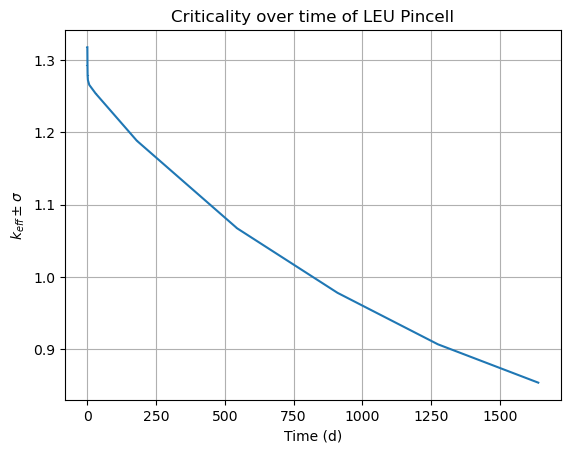

In [8]:
time,k = results.get_keff()
time /= (24*3600)

plt.errorbar(time,k[:,0],yerr=k[:,1])
plt.title('Criticality over time of LEU Pincell')
plt.xlabel("Time (d)")
plt.ylabel("$k_{eff} \pm \sigma$")
plt.grid()

Text(0, 0.5, 'Number of atoms')

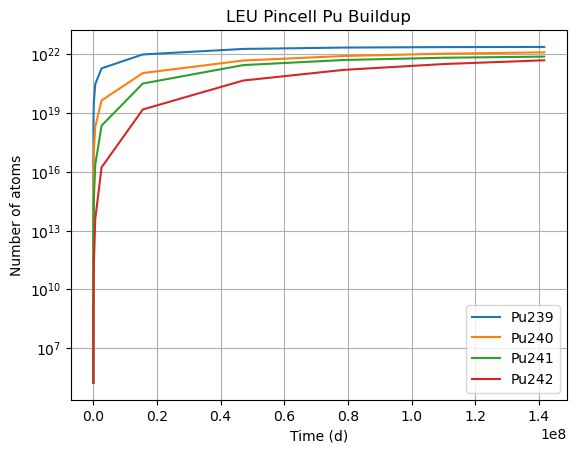

In [9]:
time, Pu239 = results.get_atoms("1","Pu239")
time, Pu240 = results.get_atoms("1","Pu240")
time, Pu241 = results.get_atoms("1","Pu241")
time, Pu242 = results.get_atoms("1","Pu242")

plt.semilogy(time,Pu239,label="Pu239")
plt.semilogy(time,Pu240,label="Pu240")
plt.semilogy(time,Pu241,label="Pu241")
plt.semilogy(time,Pu242,label="Pu242")
plt.legend()
plt.grid()
plt.title("LEU Pincell Pu Buildup")
plt.xlabel("Time (d)")
plt.ylabel("Number of atoms")

Text(0, 0.5, 'Fraction Pu239')

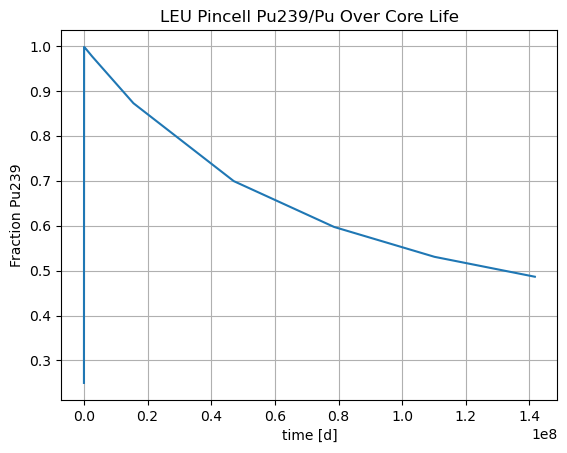

In [10]:
total_pu = Pu239 + Pu240 + Pu241 + Pu242
Pu239_frac = Pu239/total_pu

plt.plot(time,Pu239_frac,label="Fraction Pu239")
plt.grid()
plt.title("LEU Pincell Pu239/Pu Over Core Life")
plt.xlabel("time [d]")
plt.ylabel("Fraction Pu239")